# [IAPR 2019:][iapr2019] Lab 2 ‒  Object description

**Author:** first name and last name  
**Due date:** 19.04.2019

[iapr2019]: https://github.com/LTS5/iapr-2019

## Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [2]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Description
In the `lab-02-data/` folder, you will find 28x28 grey-scale pictures of handwritten "0" and "1".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

Your goal is to extract, from each of those images, a 2-dimensional feature vector (i.e. 2 features) and to plot them all on a 2D graph.
If you have chosen good features, the vectors of the "0"'s should nicely cluster in one part of the plane and those of the "1"'s in another.

Please try first the Fourier Descriptors.
You can make several attempts: e.g. with and without invariance to rotation, translation, scaling, etc.
You can also for instance rotate the images and assess the invariance in rotation.

**Note:** for the Fourier descriptors, the u_k signal has to be constructed by following the contour point after point.
Some pre-processing (image binarization, possibly some Mathematical Morphology) might be useful.

Then feel free to try other features, the more you try, the better it will be (for you).

### 1.1 Data visualization

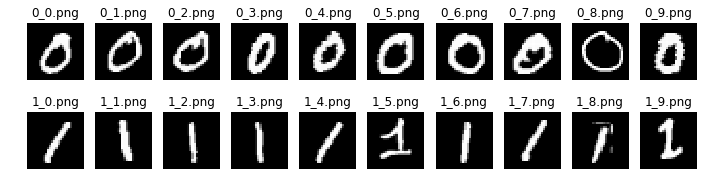

In [3]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

# Load images
data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
#  Load zeros
zeros_path = os.path.join(data_base_path, data_folder, '0')
zeros_names = [nm for nm in os.listdir(zeros_path) if '.png' in nm]  # make sure to only load .png
zeros_names.sort()  # sort file names
ic = skimage.io.imread_collection([os.path.join(zeros_path, nm) for nm in zeros_names])
zeros_im = skimage.io.concatenate_images(ic)
#  Load ones
ones_path = os.path.join(data_base_path, data_folder, '1')
ones_names = [nm for nm in os.listdir(ones_path) if '.png' in nm]  # make sure to only load .png
ones_names.sort()  # sort file names
ic = skimage.io.imread_collection(([os.path.join(ones_path, nm) for nm in ones_names]))
ones_im = skimage.io.concatenate_images(ic)

# Plot images
fig, axes = plt.subplots(2, len(zeros_im), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

### 1.2 Fourier descriptors
Add your implementation and discussion

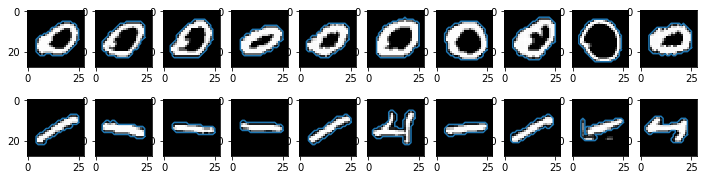

In [88]:
from skimage.measure import find_contours
from numpy.fft import fft

fig, ax = plt.subplots(2, len(zeros_im), figsize=(12, 3))

# Original image
ims = [zeros_im, ones_im]
fd_inv = []
for num in range(len(ims)):
    fd_inv.append(np.zeros((len(ims[num]), 2)))
    
    for i in range(len(ims[num])):
        # Contours
        cont = find_contours(ims[num][i], 0)
        
        cc = np.rot90(ims[num][i])
        cc = np.flip(cc, 0)
        ax[num, i].imshow(cc, cmap='gray')
        
        ax[num, i].plot(cont[0][:, 0], cont[0][:, 1])

        # DFT
        sing_cont = [ np.complex(n[1], n[0]) for n in cont[0] ]
        fd = fft(sing_cont)
        fd_ref = abs(fd[1])

        for j in range(2):
            fd_inv[num][i, 0]
            fd_inv[num][0, j]
            fd_inv[num][i, j] = abs(fd[j + 2]) / fd_ref

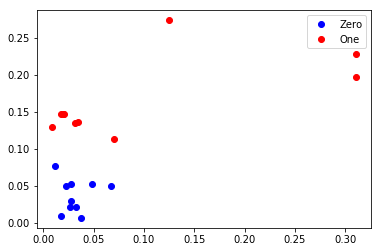

In [90]:
plt.plot(fd_inv[0][:, 0], fd_inv[0][:, 1], marker='o', lw=0, color='blue', label='Zero')
plt.plot(fd_inv[1][:, 0], fd_inv[1][:, 1], marker='o', lw=0, color='red', label='One')
plt.legend()

### 1.3 Additional method(s)
Add your implementation and discussion